In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "student_sleep.csv"
df = pd.read_csv(file_path)
df.head()


,Student_ID,Age,Gender,University_Year,Sleep_Status,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,Yes,7.7,7.9,3.4,2.0,37.0,10.0,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,Yes,6.3,6.0,1.9,5.0,74.0,2.0,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,Yes,5.1,6.7,3.9,5.0,NaN,5.0,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,Yes,6.3,8.6,2.8,4.0,55.0,9.0,19.82,NaN,6.69,9.42
4,5,20,Male,4th Year,No,4.7,2.7,2.7,0.0,85.0,3.0,20.98,6.12,8.98,9.01


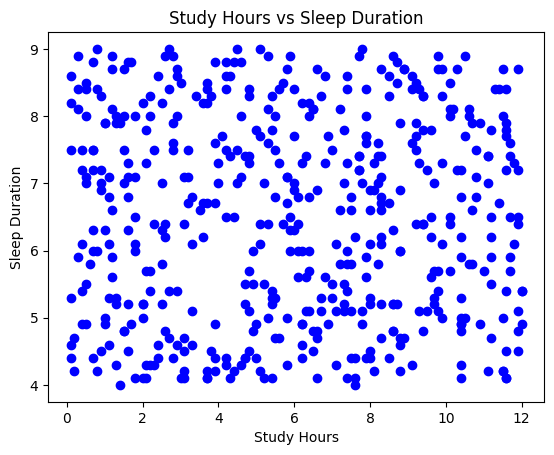

Training set shape: (397, 1) (397,)
Testing set shape: (100, 1) (100,)


In [4]:
#independent and dependent variables
X = df[['Study_Hours']]
y = df['Sleep_Duration']

# handling missing values
df.dropna(subset=['Study_Hours', 'Sleep_Duration'], inplace=True)

# visualizing the relationship
plt.scatter(X, y, color='blue')
plt.xlabel("Study Hours")
plt.ylabel("Sleep Duration")
plt.title("Study Hours vs Sleep Duration")
plt.show()

# splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#checking the shape of sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

In [6]:
#training the model
model = LinearRegression()
model.fit(X_train, y_train)

#retrieving the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

#predicting values
y_pred = model.predict(X_test)

#comparing actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

Intercept: 6.525547808377023
Slope: -0.010389015756498903
     Actual  Predicted
486     6.3   6.515159
75      6.9   6.434124
234     7.8   6.427891
178     7.5   6.452825
240     5.8   6.447630


In [9]:
#evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 1.2723654379596938
Mean Squared Error: 2.1176255912689044
Root Mean Squared Error: 1.4552063741163672
R-squared Score: -0.005453861909828772


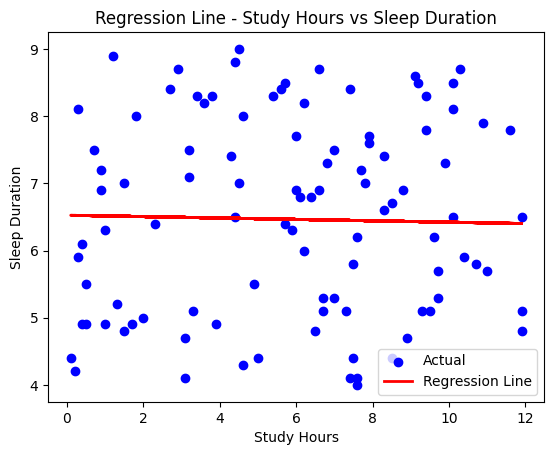

In [10]:
#visualizing the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Study Hours")
plt.ylabel("Sleep Duration")
plt.title("Regression Line - Study Hours vs Sleep Duration")
plt.legend()
plt.show()
